# Анализ данных отправки сообщения социального мониторинга

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plot

##Чтение и проверка структуры файла

In [3]:
st = pd.read_csv(filepath_or_buffer = "data/smt4.csv", sep=';', decimal=".")
st.head()

,Date,Time
0,7/21/2020,12:07
1,7/21/2020,14:32
2,7/21/2020,18:14
3,7/22/2020,11:52
4,7/22/2020,15:45


In [ ]:
#st['Time'] = pd.to_datetime(st['Time'],format= '%H:%M').dt.time
#st.sort_values(by=['TimeValue'])

## Добавлю столбец TimeDelta
также преобразую к типу timedelta
Пересчитаем столбец Hours в float по паттерну часы

In [5]:
st['TimeDelta']=pd.to_timedelta(st['Time']+':00')
st['Hours'] = st['TimeDelta'] / pd.offsets.Hour(1)
st['Hours'] = st['Hours'].round(2)
st.head()

,Date,Time,TimeDelta,Hours
0,7/21/2020,12:07,12:07:00,12.12
1,7/21/2020,14:32,14:32:00,14.53
2,7/21/2020,18:14,18:14:00,18.23
3,7/22/2020,11:52,11:52:00,11.87
4,7/22/2020,15:45,15:45:00,15.75


## Добавлю колонку Сегмент
произведу сегментацию по появлению времени в рамках дня

In [6]:
#df['Col3'] = df.groupby('Col1').transform(sum)
st['Segment'] = st.groupby('Date')['Hours'].rank(method='first')
st.sort_values(by=['Hours'])
st.head()

,Date,Time,TimeDelta,Hours,Segment
0,7/21/2020,12:07,12:07:00,12.12,1.0
1,7/21/2020,14:32,14:32:00,14.53,2.0
2,7/21/2020,18:14,18:14:00,18.23,3.0
3,7/22/2020,11:52,11:52:00,11.87,1.0
4,7/22/2020,15:45,15:45:00,15.75,2.0


## Строим диаграмму 
На основе колонок Segment и TimeValue построим точечню диаграмму

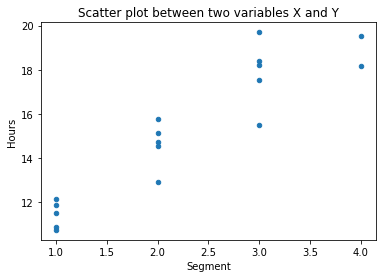

In [7]:
st.plot.scatter(y='Hours', x='Segment', title= "Scatter plot between two variables X and Y");
plot.show(block=True);